# Statistical learning : Model Selection
1. [Intuitive approach to SVM](#Intuitive-approach-to-SVM-)
1. [Classification](#Classification)
1. [Regression](#Regression)
1. [Regression with precomputed kernel](#Regression-with-precomputed-kernel)

In [1]:
from sllab import *


Packages:
    numpy as np
    pandas as pd
    matplotlib.pyplot as plt

Functions:
    plotXY
    plot_frontiere
    map_regions



# Intuitive approach to SVM

Download the [svm_gui.py](https://who.rocq.inria.fr/Kevin.Zagalo/docs/IMC-4302C/Lab4/svm_gui.py) script on the same folder as this notebook.

>The following expression enables to assess, in real time, the impact of a kernel and of the tradeoff parameter $C = \frac{1}{n\lambda}$.

In [ ]:
!python3 svm_gui.py

>Make some tests with this GUI.
In particular, design
- linearly separable data / or not;
- unimodal classes / or not,

>and compare
- different kernels;
- different values for C and for hyperparameters (kernel parameters).

>For unimodal classes (first, linearly separable, then not), how do the margin and the frontiere behave with respect to $C$ (for a linear kernel) and to $\gamma$ (for a Gaussian kernel)?

>Are the values for these two parameters decisive for obtaining good classification rates?

>Fit a linear classifier on unimodal (but not linearly separable) classes. Add some points one at a time.

>Determine three particular areas for the classifier.
How does the classifier react when adding a point in each area?

>What can we say about the dual variable $\alpha_i$ (associated to each point $X_i$) for each area?

>Design a very unbalanced dataset (really more points in a class than in the other).
With a linear kernel, decrease gradually the value of $C$. What do you observe?

>This penomenon can be avoided with a class-dependent weighting of the data-fitting term (parameter `class_weight` of [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)).

# Classification
>Let us consider the dataset defined below.

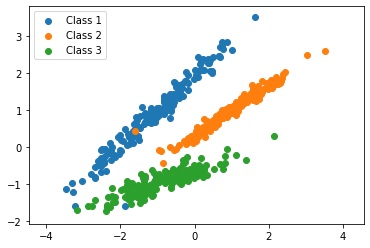

In [29]:
# Classification dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=3,
                           n_features=2, n_redundant=0, n_clusters_per_class=1)

plotXY(X, y)

>For $C \in \{10^{-3}, \dots, 10^{2}\}$, fit a [linear support vector classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and store its classification accuray. Use the $\verb!map_regions!$ function to color the regions of classification.

>Plot the score vs the values of $C$.

>Determine the value of $C$ leading to the best score.

# Regression
>What about for this dataset?

In [3]:
# Regression dataset
n = 100
X_train = np.sort(5 * np.random.rand(n))
y_train = np.sin(X_train)
y_train[::5] += 1 * (0.5 - np.random.rand(n//5))

X_test = np.arange(0, 5, step=1e-2)
y_test = np.sin(X_test)

# Make 2d-arrays
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

plt.scatter(X_train, y_train)

>Plot on the same figure the training points and the prediction for the test set.

# Regression with precomputed kernel


>We focus here on molecule activity prediction.
For this purpose, we consider a molecule to be a graph, represented by a set of relations between its nodes (the atoms of the molecule).
Following these relations in a molecule $x$, we go over a path $p$ in the corresponding graph.
Let $\mathcal P_d$ be the set of all possible paths of length less than $d$ for the family of graph considered.
Let also $I(x, p)$ being $1$ if the path $p$ is in the molecule $x$ and $0$ otherwise.
Then, for two molecules $x$ and $x'$, we can define the similarity measure
$$
    u(x, x') = \sum_{p \in \mathcal P_d} I(x, p) I(x', p).
$$
The *Tanimoto kernel* is then defined by
$$
    k(x, x') = \frac{u(x, x')}{u(x, x) + u(x', x') - u(x, x')}.
$$

>Please, download the [dataset](https://who.rocq.inria.fr/Kevin.Zagalo/docs/IMC-4302C/Lab4/data_ncicancer.zip) in the directory `./data/` and run the following script to build the train and test kernel matrices.

In [10]:
import os
path = os.path.join(os.getcwd(), 'data')

# Load the data
K = np.loadtxt(os.path.join(path, "ncicancer_kernel_hf_ex0.txt")) # Load the kernel
y = np.loadtxt(os.path.join(path, "ncicancer_targets_ex0.txt"))[:, 0] # Load the targets
y = (y-np.min(y)) / (np.max(y)-np.min(y)) # Scale the targets

# Split train/test sets
indices = np.random.permutation(K.shape[0])
train_idx, test_idx = indices[:K.shape[0]//4], indices[K.shape[0]//4:]
K_train = K[train_idx][:, train_idx]
y_train = y[train_idx]
K_test = K[test_idx][:, train_idx]
y_test = y[test_idx]

print("Number of training examples:", K_train.shape[0])
print("Number of test examples:", K_test.shape[0])

Number of training examples: 576
Number of test examples: 1729


>We would like to apply support vector regression.
Plot the training and test accuracies for $C=10^{-1}$ and different values of $\epsilon$ in $[10^{-3}, 10^{-1}]$.

>Do the same with kernel regularized regression.

>Given the kernel matrices for training and testing, give the best possible accuracy on the test sample with a kernel machine.
The testing data should not intervene in fitting the model.

>Compare to regularized regression with kernels.